# Linear Regression from Scratch — Salary vs Years of Experience

This notebook demonstrates a **simple linear regression** implemented from scratch (no scikit-learn).  
Me use a small salary dataset to predict **Salary** based on **YearsExperience**.

**This notebook shows:**
- How to load & inspect the data
- How to implement ordinary least squares linear regression (analytical solution)
- How to compute evaluation metrics (MAE, MSE, RMSE, R²)
- How to make a prediction for a sample input
- How to visualize data and the fitted regression line

---

**How to use**
1. Upload `kaggle/linear_regression/Salary_dataset.csv` to the notebook environment (or adjust the path).
2. Run cells in order.
3. Do **not** modify the model code block if you want the exact results reproduced.


# LOAD DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('datasets/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [ ]:
df = df.loc[:, ['YearsExperience', 'Salary']]
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


# DATA PROCESSING
Brief: extract the independent (x) and dependent (y) arrays, and compute sample count `n`.

In [ ]:
x = df["YearsExperience"].values
y = df["Salary"].values

In [ ]:
n = len(x)

# MODELING
Me compute sums and then apply the closed-form formulas for slope (b) and intercept (a).

In [ ]:
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)
sum_x2 = np.sum(x*x)

In [ ]:
a = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)
b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)

In [ ]:
yearsExp = 2.1
salary_pred = a + b * yearsExp
print("Years Experience:", yearsExp, "| Salary Prediction: ", salary_pred)

Years Experience: 2.1 | Salary Prediction:  44693.12484157875


# EVALUATION
Me compute predicted values for the training set and classic regression metrics:
* Residual Sum of Squares (SS_res)
* Total Sum of Squares (SS_tot)
* R-squared
* MAE, MSE, RMSE

In [ ]:
y_pred = a + b * x

In [ ]:
SS_res = np.sum((y - y_pred)**2)
SS_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - SS_res/SS_tot

In [ ]:
mae = np.mean(np.abs(y - y_pred))
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)

In [ ]:
print("Model Performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

Model Performance:
MAE:  4644.201289443533
MSE:  31270951.722280953
RMSE: 5592.04360876066
R-squared: 0.9569566641435086


# VISUALIZATION
Scatter plot of the raw data and the fitted regression line.

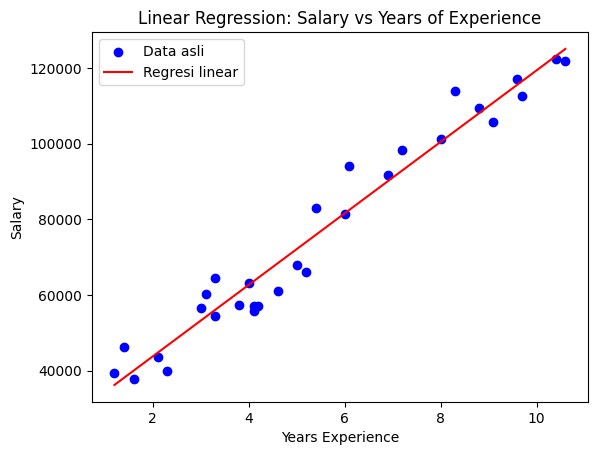

In [ ]:
plt.title("Linear Regression: Salary vs Years of Experience")
plt.scatter(x, y, color="blue", label="Data asli")
plt.plot(x, y_pred, color="red", label="Regresi linear")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()